In [357]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import math
import timeit

# Individual Stocks

In [3]:
bb = yf.Ticker("BB")

In [14]:
bb.info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'previousClose', 'regularMarketOpen', 'twoHundredDayAverage', 'trailingAnnualDividendYield', 'payoutRatio', 'volume24Hr', 'regularMarketDayHigh', 'navPrice', 'averageDailyVolume10Day', 'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage', 'trailingAnnualDividendRate', 'open', 'toCurrency', 'averageVolume10days', 'expireDate', 'yield', 'algorithm', 'dividendRate', 'exDividendDate', 'beta', 'circulatingSupply', 'startDate', 'regularMarketDayLow', 'priceHint', 'currency', 'regularMarketVolume', 'lastMarket', 'maxSupply', 'openInterest', 'marketCap', 'volumeAllCurrencies', 'strikePrice', 'averageVolume', 'priceToSalesTrailing12Months', 'dayLow', 'ask', 'ytdReturn', 'askSize', 'volume', 'fiftyTwoWeekHigh', 'forwardPE', 'fromCurrency', 'fiveYearAvgDividendYield', 'fiftyTwoWeekLow', 'bid', 'tradeable', 'dividendY

In [152]:
bb.info['marketCap']

5007219200

# Multiple Tickers / Portfolios / Indices

In [273]:
portfolio_tickers = ["BB", "BP", "AMD", "AAL", "PLTR", "KO", "V", "CRM"]
portfolio_weights = np.repeat(1/len(portfolio_tickers), len(portfolio_tickers))
portfolio = yf.Tickers(" ".join(portfolio_tickers))

In [101]:
[portfolio.tickers[i].info.get('sector') for i in portfolio_tickers]
[portfolio.tickers[i].info.get('marketCap') for i in portfolio_tickers]
[portfolio.tickers[i].info.get('industry') for i in portfolio_tickers]
[portfolio.tickers[i].info.get('previousClose') for i in portfolio_tickers]

[9.06, 25.5, 83.91, 21.3, 23.37, 54.26, 236.86, 234.36]

In [121]:
pd.concat([portfolio.tickers[i].sustainability for i in portfolio_tickers], axis = 1, keys = portfolio_tickers)

,AAL,KO,V,CRM
,Value,Value,Value,Value
2021-3,,,,
palmOil,False,False,False,False
controversialWeapons,False,False,False,False
gambling,False,False,False,False
socialScore,12.65,10.81,9.83,6.49
nuclear,False,False,False,False
furLeather,False,False,False,False
alcoholic,False,False,False,False
gmo,False,False,False,False


# Financial Statements

In [186]:
port_financial = {i : portfolio.tickers[i].get_financials() for i in portfolio_tickers}
port_balance_sheet = {i : portfolio.tickers[i].get_balance_sheet() for i in portfolio_tickers}
port_cashflow = {i : portfolio.tickers[i].get_cashflow() for i in portfolio_tickers}

In [211]:
port_financial['BB']

,2021-02-28,2020-02-29,2019-02-28,2018-02-28
Research Development,2.15e+08,2.59e+08,2.17e+08,2.34e+08
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,-1.113e+09,-1.48e+08,7.7e+07,4.06e+08
Minority Interest,None,None,None,None
Net Income,-1.104e+09,-1.52e+08,9.3e+07,4.05e+08
Selling General Administrative,3.42e+08,5.19e+08,3.9e+08,4e+08
Gross Profit,6.43e+08,7.68e+08,7e+08,6.81e+08
Ebit,-9.6e+07,-2.04e+08,-4.3e+07,-1.06e+08
Operating Income,-9.6e+07,-2.04e+08,-4.3e+07,-1.06e+08
Other Operating Expenses,None,None,None,None


# Mean - Variance

In [254]:
port_stock_history = {ticker : portfolio.tickers[ticker].history(period = "5y") for ticker in portfolio_tickers} 

In [341]:
for ticker in port_stock_history:
    port_stock_history[ticker]['log_returns'] = np.log(port_stock_history[ticker].Close/port_stock_history[ticker].Close.shift(1))

In [355]:
#Daily
mean_log_rets = {ticker : port_stock_history[ticker].log_returns.mean() for ticker in portfolio_tickers}
stdev_log_rets = {ticker : port_stock_history[ticker].log_returns.std() for ticker in portfolio_tickers}
mean_log_rets

{'BB': 0.00017782985896287024,
 'BP': 3.0069867934254848e-05,
 'AMD': 0.0024507064782608363,
 'AAL': -0.0003346090425785444,
 'PLTR': 0.006068082718887838,
 'KO': 0.0002756742975310548,
 'V': 0.0008936678895269704,
 'CRM': 0.0008683805741862102}

In [396]:
#Monthly
monthly_log_returns = {ticker: port_stock_history[ticker].resample('M')['log_returns'].sum() for ticker in portfolio_tickers}
pd.concat(monthly_log_returns, axis = 1).apply(np.mean)
pd.concat(monthly_log_returns, axis = 1).apply(np.std)

BB      0.155811
BP      0.073683
AMD     0.155917
AAL     0.132251
PLTR    0.388298
KO      0.047649
V       0.057267
CRM     0.077907
dtype: float64

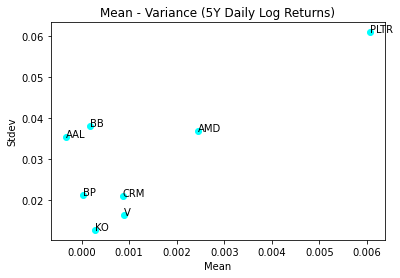

In [426]:
plt.scatter(x = mean_log_rets.values(), y = stdev_log_rets.values(), color = 'cyan')
plt.title("Mean - Variance (5Y Daily Log Returns)")
plt.xlabel("Mean")
plt.ylabel("Stdev")
for ticker in portfolio_tickers:
    plt.annotate(ticker, (mean_log_rets[ticker], stdev_log_rets[ticker]))

In [150]:
%timeit portfolio.tickers['BP'].get_cashflow()

466 ns ± 30.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [147]:
%timeit portfolio.tickers['BP'].cashflow

537 ns ± 11.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
